In [5]:
from src.sentinel_api import get_sentinel_api
from src.constant import GEOJSON_PATH, DOWNLOADED_DATA_PATH, REMOVE_ZIPS
import os

# get api 
api = get_sentinel_api()

In [6]:
# search by polygon, time, and Hub query keywords
products_query = api.query(
                    limit = 1,
                    filename = 'S2A_*',
                    producttype = 'S2MSI1C')

os.makedirs(DOWNLOADED_DATA_PATH, exist_ok = True) 
products = api.download_all(products_query, DOWNLOADED_DATA_PATH)
print(products)

Downloading: 100%|██████████| 657M/657M [00:29<00:00, 22.2MB/s]
MD5 checksumming: 100%|██████████| 657M/657M [00:17<00:00, 38.5MB/s](OrderedDict([('45991bb6-747f-4b86-bd87-74820953e139', {'id': '45991bb6-747f-4b86-bd87-74820953e139', 'title': 'S2A_MSIL1C_20200531T101601_N0209_R065_T44XNR_20200531T121545', 'size': 656653781, 'md5': '652F22FE133AF8350421EC66A25106E6', 'date': datetime.datetime(2020, 5, 31, 10, 16, 1, 24000), 'footprint': 'POLYGON((80.99871964573315 81.95691940406579,87.99327367073681 81.89742371407047,87.24296688492086 80.92029861138599,80.99885817391285 80.97326367254617,80.99871964573315 81.95691940406579))', 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('45991bb6-747f-4b86-bd87-74820953e139')/$value", 'Online': True, 'Creation Date': datetime.datetime(2020, 5, 31, 15, 46, 17, 704000), 'Ingestion Date': datetime.datetime(2020, 5, 31, 15, 45, 17, 634000), 'path': './src/data/S2A_MSIL1C_20200531T101601_N0209_R065_T44XNR_20200531T121545.zip', 'downloaded_byt

In [7]:
file_titles = []
zip_files = []

for product in products:
    for product_id in product:
        file_titles.append(product[product_id]['title'])
        zip_files.append(product[product_id]['path'])

        import zipfile
        archive = zipfile.ZipFile(product[product_id]['path'], 'r')
        archive.extractall(path=DOWNLOADED_DATA_PATH)

for zip_file in zip_files:
    if REMOVE_ZIPS:
        os.remove(zip_file)     

T44XNR_20200531T101601_B01.jp2


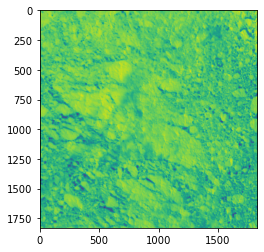

T44XNR_20200531T101601_B02.jp2


MemoryError: Unable to allocate 230. MiB for an array with shape (1, 10980, 10980) and data type uint16

In [12]:
import rasterio
import rasterio.features
import rasterio.warp
import matplotlib.pyplot as plt

for file_title in file_titles:
    granule_path = os.path.join(DOWNLOADED_DATA_PATH, '{}.SAFE'.format(file_title), 'GRANULE')
    img_data_path = os.path.join(granule_path, os.listdir(granule_path)[0], 'IMG_DATA')
    for jp2_file_name in sorted(os.listdir(img_data_path)):
        print(jp2_file_name)
        jp2_file_path =  os.path.join(measurement_path, jp2_file_name)   

        with rasterio.open(jp2_file_path, "r", driver='JP2OpenJPEG') as dataset:
            # Read the dataset's data
            data = dataset.read(1)

            # Visualise the dataset's data
            fig, ax = plt.subplots()
            img = ax.imshow(data.real)
            plt.show()